In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
print('导入需要的包')

导入需要的包


In [2]:
df = pd.read_csv('winequality-red.csv',sep=';')
print('导入数据集')

导入数据集


In [3]:
print("--- 数据前5行 ---")
print(df.head())

print("--- 数据基本信息 ---")
df.info()

print("--- 数据统计描述 ---")
print(df.describe())

--- 数据前5行 ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

--- 缺失值检查 ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
--- 异常值处理 ---
特征 'fixed acidity' 发现 49 个异常值。
特征 'volatile acidity' 发现 19 个异常值。
特征 'citric acid' 发现 1 个异常值。
特征 'residual sugar' 发现 155 个异常值。
特征 'chlorides' 发现 112 个异常值。
特征 'free sulfur dioxide' 发现 30 个异常值。
特征 'total sulfur dioxide' 发现 55 个异常值。
特征 'density' 发现 45 个异常值。
特征 'pH' 发现 35 个异常值。
特征 'sulphates' 发现 59 个异常值。
特征 'alcohol' 发现 13 个异常值。


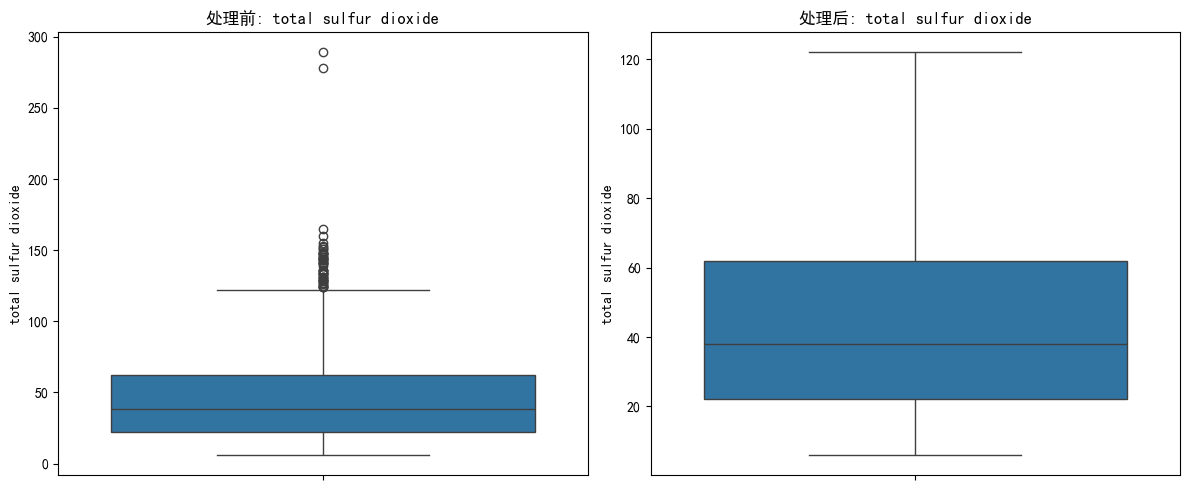

处理后的数据已保存为 'winequality-red-cleaned.csv'


In [4]:
print("--- 缺失值检查 ---")
print(df.isnull().sum())

# 2. 异常值处理 (使用IQR法则)
print("--- 异常值处理 ---")
df_cleaned = df.copy() # 创建一个副本进行操作

# 遍历除 'quality' 之外的所有特征列
for col in df_cleaned.columns.drop('quality'):
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 识别异常值
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    if not outliers.empty:
        print(f"特征 '{col}' 发现 {len(outliers)} 个异常值。")

    # 处理异常值（盖帽法）
    df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)
    
# 可视化对比其中一个特征处理前后的效果
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['total sulfur dioxide'])
plt.title('处理前: total sulfur dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['total sulfur dioxide'])
plt.title('处理后: total sulfur dioxide')
plt.tight_layout()
plt.show()

# 3. 保存成新的数据表格
df_cleaned.to_csv('winequality-red-cleaned.csv', index=False)
print("处理后的数据已保存为 'winequality-red-cleaned.csv'")

In [5]:
# 导入所需的库
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 假设 df_cleaned 是你处理好的数据框

# --- 1. 分离特征 (X) 和目标 (y) ---
# 目标通常是我们要预测的列，比如 'quality'
# 特征是除了目标之外的所有数值型列
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']

# --- 2. 对特征数据 X 进行标准化 ---
# 创建一个标准化处理器对象
scaler = StandardScaler()

# 使用 .fit_transform() 对特征数据 X 进行拟合和转换
# fit(): 计算 X 的均值(μ)和标准差(σ)
# transform(): 使用计算好的 μ 和 σ 对 X 进行标准化
# fit_transform() 是上面两步的结合，更高效
X_scaled = scaler.fit_transform(X)

# --- 3. (可选) 将标准化后的数组转回 DataFrame ---
# 这步有助于查看和理解数据，但对于后续模型训练不是必须的
# X.columns 包含了原始的列名
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


print(df.describe())
# 现在，X_scaled (或 X_scaled_df) 就是一个标准化处理过的数据集
# 它的均值接近0，标准差接近1
# 你可以把它投入到 PCA 或其他机器学习模型中了
print("标准化后的数据前5行：")
print(X_scaled_df.head())

print("标准化后数据的均值：")
print(X_scaled_df.mean())

print("标准化后数据的标准差：")
print(X_scaled_df.std())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
def categorize_quality(quality):
    if quality >= 7:
        return '好酒'  # 你也可以用英文 'good'
    else:
        return '差酒'  # 你也可以用英文 'bad'

# 2. 在 df_cleaned 中创建新的一列 'wine_type'
# .apply() 会将 'quality' 列的每一个值都作为参数传给 categorize_quality 函数
df_cleaned['wine_type'] = df_cleaned['quality'].apply(categorize_quality)

# 3. (可选) 检查一下结果
print("新创建的 'wine_type' 列的分类统计：")
print(df_cleaned['wine_type'].value_counts())

# 4. 查看一下数据表格，确认新列已添加
print("带有新列的数据前5行：")
print(df_cleaned.head())

新创建的 'wine_type' 列的分类统计：
wine_type
差酒    1382
好酒     217
Name: count, dtype: int64
带有新列的数据前5行：
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       

In [7]:
X = df_cleaned.drop('wine_type', axis=1)
y = df_cleaned['wine_type']

# 2. 对特征进行标准化 (PCA 和 t-SNE 需要)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 对目标标签进行编码 ('好酒' -> 1, '差酒' -> 0)
# LDA 和可视化都需要数字标签
le = LabelEncoder()
y_encoded = le.fit_transform(y)


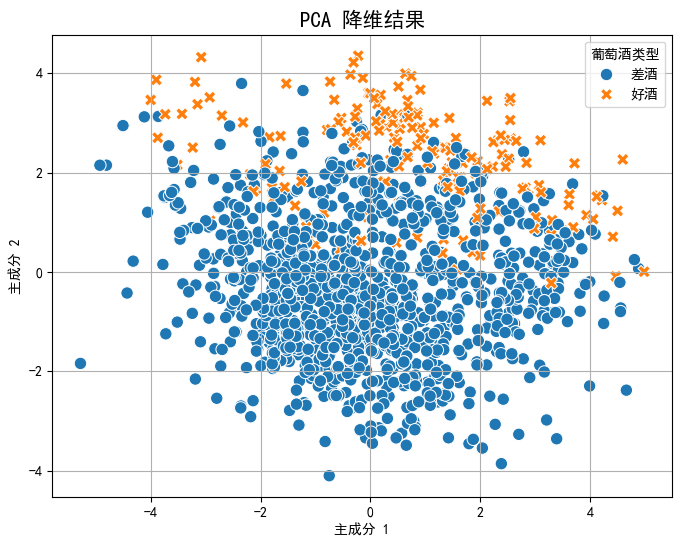

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=y, s=80)
plt.title('PCA 降维结果', fontsize=15)
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend(title='葡萄酒类型')
plt.grid(True)
plt.show()

LDA 降维成功！X_lda 的维度是: (1599, 1)


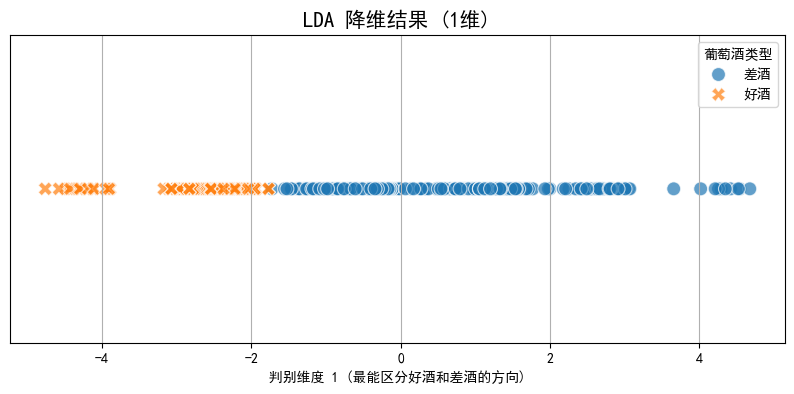

In [11]:
lda = LDA(n_components=1) # 对于2分类问题，n_components最多只能是1
X_lda = lda.fit_transform(X_scaled, y_encoded)

print("LDA 降维成功！X_lda 的维度是:", X_lda.shape)

# 可视化
y_axis_zeros = np.zeros(X_lda.shape[0])

plt.figure(figsize=(10, 4)) # 把图调得宽一点、扁一点，更适合看一维分布

# x轴使用LDA的第0列，y轴使用我们创建的全是0的数组
sns.scatterplot(x=X_lda[:, 0], y=y_axis_zeros, hue=y, style=y, s=100, alpha=0.7)

plt.title('LDA 降维结果 (1维)', fontsize=15)
plt.xlabel('判别维度 1 (最能区分好酒和差酒的方向)')
plt.ylabel('')     # y轴没有意义，所以标签为空
plt.yticks([])     # 隐藏y轴的刻度，让图更干净
plt.legend(title='葡萄酒类型')
plt.grid(True, axis='x') # 只显示x轴的网格线
plt.show()

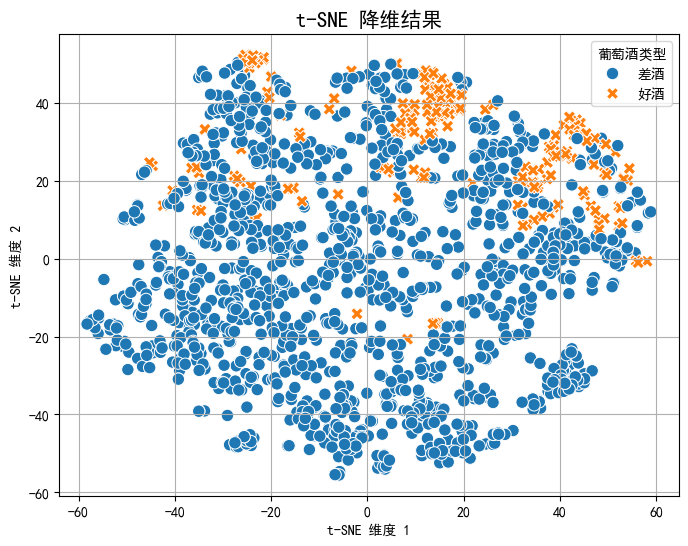

In [12]:
# --- t-SNE ---
# t-SNE 计算量较大，如果数据量超过几万，可能需要很长时间
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, style=y, s=80)
plt.title('t-SNE 降维结果', fontsize=15)
plt.xlabel('t-SNE 维度 1')
plt.ylabel('t-SNE 维度 2')
plt.legend(title='葡萄酒类型')
plt.grid(True)
plt.show()
